In [21]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('D:\\jupyter\EPICS Models\\Model -24- HIV Prediction\\dataset\\training_data.csv')
test_data = pd.read_csv('D:\\jupyter\EPICS Models\\Model -24- HIV Prediction\\dataset\\test_data.csv')


In [22]:
train_data.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


<AxesSubplot:xlabel='Resp', ylabel='count'>

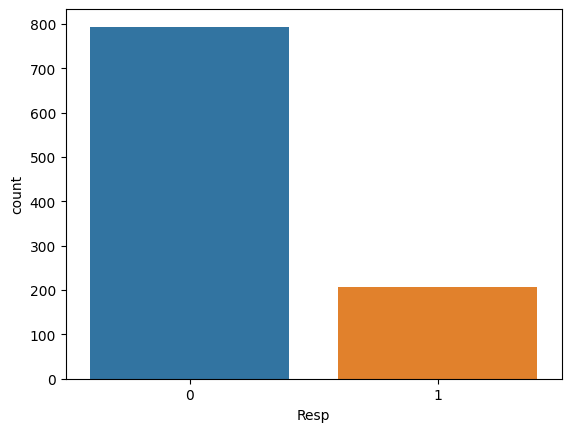

In [23]:
import seaborn as sns
sns.countplot(train_data['Resp'])

In [24]:
train_data['Resp'].value_counts()

0    794
1    206
Name: Resp, dtype: int64

In [25]:
# Class count
count_class_1, count_class_0 = train_data.Resp.value_counts()

# Divide by class
df_class_0 = train_data[train_data['Resp'] == 1]
df_class_1 = train_data[train_data['Resp'] == 0]

In [26]:
df_class_0_over = df_class_0.sample(count_class_1+100,replace=True)
df_test_over = pd.concat([df_class_1,df_class_0_over],axis=0)

print('Random over-sampling:')
print(df_test_over.Resp.value_counts())

Random over-sampling:
1    894
0    794
Name: Resp, dtype: int64


<AxesSubplot:>

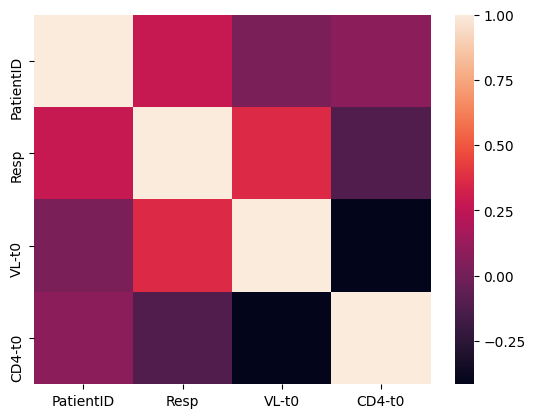

In [27]:
corr = train_data.corr()
sns.heatmap(corr)

In [28]:
from sklearn.model_selection import train_test_split
X = train_data[['VL-t0','CD4-t0']]
Y = train_data['Resp'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
predicted = knn_model.predict(x_test)
print('KNN', accuracy_score(predicted, y_test))

KNN 0.7666666666666667


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=200,min_samples_split= 5,n_estimators= 500)
rfc_model.fit(x_train, y_train)
predicted = rfc_model.predict(x_test)
print('Random Forest', accuracy_score(y_test, predicted))

Random Forest 0.75


In [58]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(x_train, y_train)
predicted = svc_model.predict(x_test)
print('SVM', accuracy_score(y_test, predicted))

SVM 0.7866666666666666


In [59]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
predicted = xgb_model.predict(x_test)
print('XGBoost', accuracy_score(y_test, predicted))

XGBoost 0.7266666666666667


In [60]:
test = test_data[['VL-t0','CD4-t0']]
predict = svc_model.predict(test)

In [61]:
submissions = pd.DataFrame({
    'PatientID': np.arange(1,predict.shape[0]+1),
    'ResponderStatus': predict
})
submissions.to_csv('submission.csv', index=False)

In [63]:
import pickle
with open('hiv_model.pkl', 'wb') as files:
    pickle.dump(svc_model, files)